In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from scipy.stats import chi2_contingency
sns.set_style("darkgrid")

/var/folders/c7/n6xdt4qn2ps77x3wbpyn1yfr0000gn/T/ipykernel_51072/1620489811.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Importing the dataset  
df = pd.read_csv('/Users/deogirekartik/Vscode/Technical Seminar/datset/healthcare-dataset-stroke-data.csv')

In [3]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

## Dropping unwanted column


In [5]:
df.drop(['id'], axis = 1, inplace = True)

In [6]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [7]:
frequency_distribution = df['smoking_status'].value_counts()
print("Frequency Distribution:\n", frequency_distribution)

Frequency Distribution:
 smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [8]:
contingency_table = pd.crosstab(df['smoking_status'], df['stroke'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p)

Chi-square statistic: 29.147269191399264
P-value: 2.0853997025008455e-06


In [9]:

df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [10]:
frequency_distribution = df['work_type'].value_counts()
print("Frequency Distribution:\n", frequency_distribution)

Frequency Distribution:
 work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


In [11]:
contingency_table = pd.crosstab(df['work_type'], df['stroke'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p)

Chi-square statistic: 49.163511976675295
P-value: 5.397707801896119e-10


In [12]:
frequency_distribution = df['ever_married'].value_counts()
print("Frequency Distribution:\n", frequency_distribution)

Frequency Distribution:
 ever_married
Yes    3353
No     1757
Name: count, dtype: int64


In [13]:
contingency_table = pd.crosstab(df['ever_married'], df['stroke'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p)

Chi-square statistic: 58.923890259034195
P-value: 1.6389021142314745e-14


In [14]:
contingency_table = pd.crosstab(df['Residence_type'], df['stroke'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p)

Chi-square statistic: 1.0816367471627524
P-value: 0.29833169286876987


## Finding Null Values 

In [15]:
# Null values present in the dataset

df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [16]:
#Dropping the null values
df.dropna(inplace = True)
df.shape
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [17]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [18]:
numerical_cols = [cols for cols in df.columns if df.dtypes[cols] != 'O']

<Axes: >

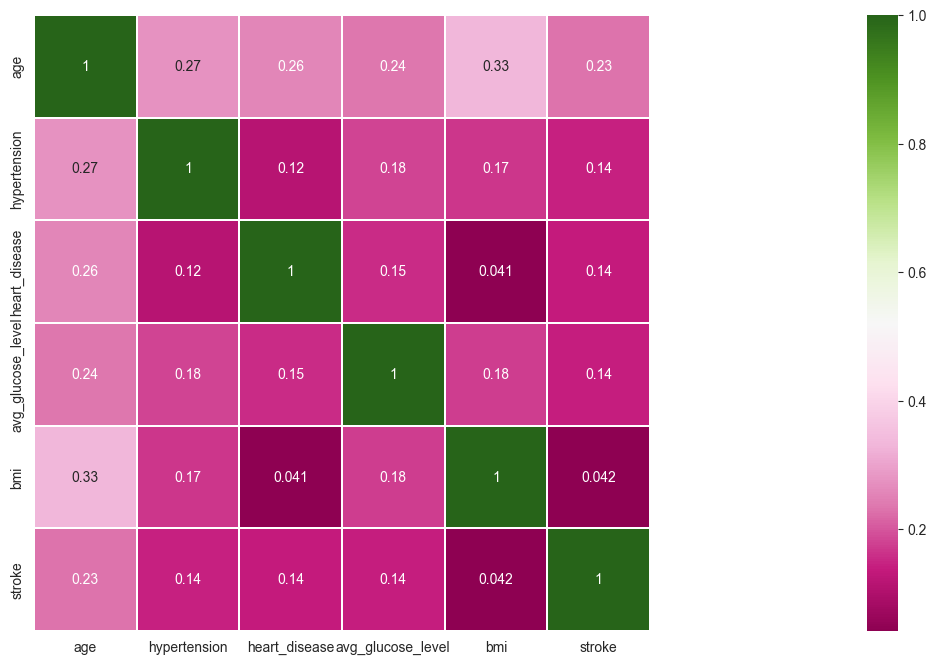

In [19]:
plt.figure(figsize=(56, 8))
corr = df.loc[:,numerical_cols].corr(method="pearson")
sns.heatmap(corr, cmap='PiYG', square=True, linewidths=.2, annot = True)
# plt.tight_layout()

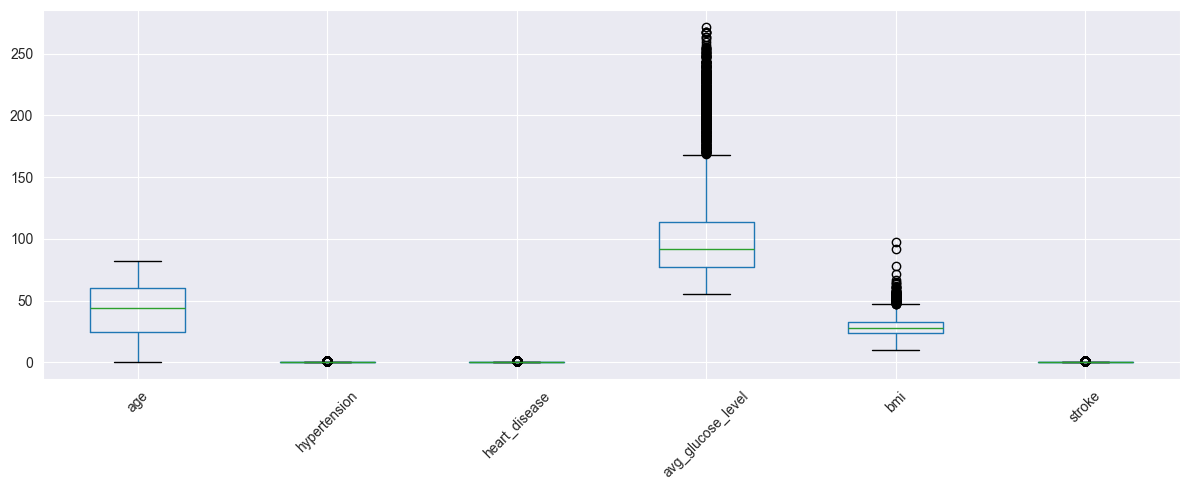

In [20]:
plt.figure(figsize=(12, 5))
df.boxplot(fontsize=10)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

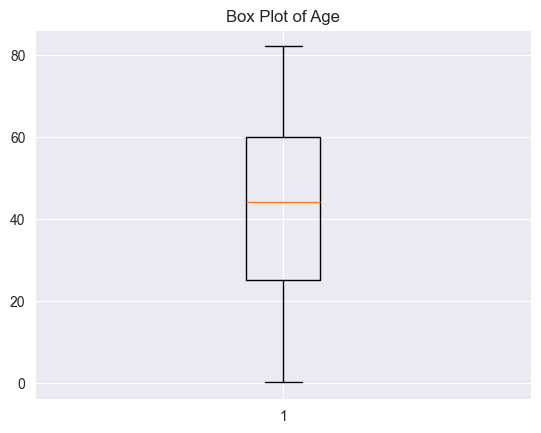

Potential Outliers in Age:
Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke, Z_Score_age]
Index: []


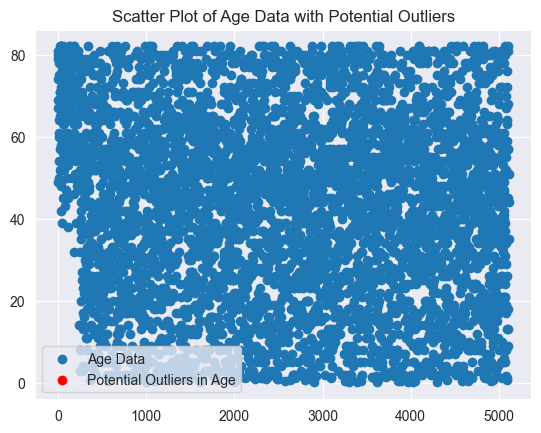

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'age' is the column containing the data in your DataFrame 'df'
# If you want to analyze a different column, replace 'age' with the desired column name

# Visualize the data using a box plot
plt.boxplot(df['age'].dropna())  # Drop NaN values to avoid issues with plotting
plt.title('Box Plot of Age')
plt.show()

# Calculate z-scores to identify potential outliers
df['Z_Score_age'] = (df['age'] - df['age'].mean()) / df['age'].std()

# Set a z-score threshold (e.g., ±3) to identify outliers
z_score_threshold = 3
outliers_age = df[abs(df['Z_Score_age']) > z_score_threshold]

# Display potential outliers
print("Potential Outliers in Age:")
print(outliers_age)

# Explore the nature of outliers (you might add additional domain-specific checks)
for index, row in outliers_age.iterrows():
    print(f"Data point at index {index} might be an outlier. Age: {row['age']}")

# Visualize the data with potential outliers in age highlighted
plt.scatter(df.index, df['age'], label='Age Data')
plt.scatter(outliers_age.index, outliers_age['age'], color='red', label='Potential Outliers in Age')
plt.title('Scatter Plot of Age Data with Potential Outliers')
plt.legend()
plt.show()


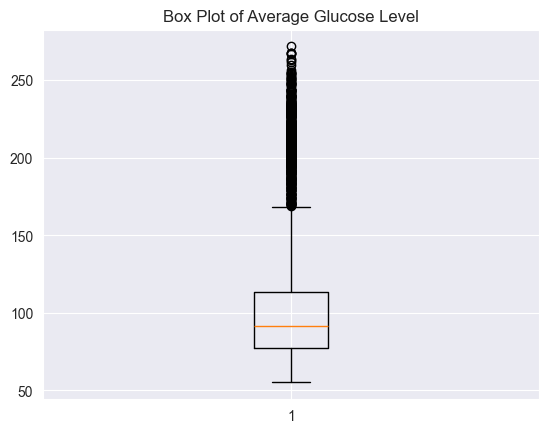

Potential Outliers in Average Glucose Level:
      gender   age  hypertension  heart_disease ever_married      work_type  \
33      Male  80.0             0              1          Yes  Self-employed   
45      Male  76.0             1              0          Yes        Private   
76      Male  80.0             1              0          Yes        Private   
97      Male  58.0             0              1          Yes        Private   
122     Male  80.0             0              0          Yes        Private   
123     Male  56.0             1              0          Yes        Private   
135   Female  71.0             0              0          Yes       Govt_job   
149   Female  70.0             0              1          Yes        Private   
193     Male  68.0             1              1          Yes        Private   
196     Male  70.0             1              0          Yes        Private   
220     Male  81.0             1              1          Yes        Private   
243   F

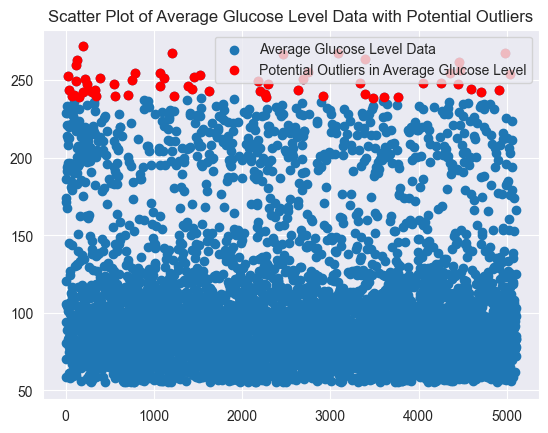

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'avg_glucose_level' is the column containing the data in your DataFrame 'df'
# If you want to analyze a different column, replace 'avg_glucose_level' with the desired column name

# Visualize the data using a box plot
plt.boxplot(df['avg_glucose_level'].dropna())  # Drop NaN values to avoid issues with plotting
plt.title('Box Plot of Average Glucose Level')
plt.show()

# Calculate z-scores to identify potential outliers
df['Z_Score_glucose'] = (df['avg_glucose_level'] - df['avg_glucose_level'].mean()) / df['avg_glucose_level'].std()

# Set a z-score threshold (e.g., ±3) to identify outliers
z_score_threshold = 3
outliers_glucose = df[abs(df['Z_Score_glucose']) > z_score_threshold]

# Display potential outliers
print("Potential Outliers in Average Glucose Level:")
print(outliers_glucose)

# Explore the nature of outliers (you might add additional domain-specific checks)
for index, row in outliers_glucose.iterrows():
    print(f"Data point at index {index} might be an outlier. Average Glucose Level: {row['avg_glucose_level']}")

# Visualize the data with potential outliers in average glucose level highlighted
plt.scatter(df.index, df['avg_glucose_level'], label='Average Glucose Level Data')
plt.scatter(outliers_glucose.index, outliers_glucose['avg_glucose_level'], color='red', label='Potential Outliers in Average Glucose Level')
plt.title('Scatter Plot of Average Glucose Level Data with Potential Outliers')
plt.legend()
plt.show()


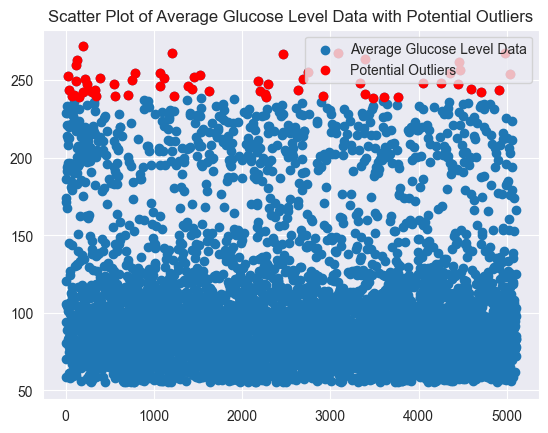

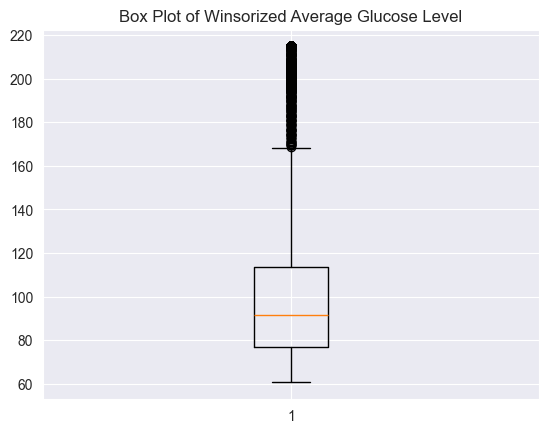

Summary Statistics after Winsorizing:
count    4909.000000
mean      104.631281
std        41.985900
min        60.610000
25%        77.070000
50%        91.680000
75%       113.570000
max       214.730000
Name: avg_glucose_level_winsorized, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

# Assuming 'avg_glucose_level' is the column containing the data in your DataFrame 'df'
# If you want to analyze a different column, replace 'avg_glucose_level' with the desired column name

# Calculate z-scores to identify potential outliers
df['Z_Score_glucose'] = (df['avg_glucose_level'] - df['avg_glucose_level'].mean()) / df['avg_glucose_level'].std()

# Set a z-score threshold (e.g., ±3) to identify outliers
z_score_threshold = 3
outliers_glucose = df[abs(df['Z_Score_glucose']) > z_score_threshold]

# Visualize the data with potential outliers in average glucose level highlighted
plt.scatter(df.index, df['avg_glucose_level'], label='Average Glucose Level Data')
plt.scatter(outliers_glucose.index, outliers_glucose['avg_glucose_level'], color='red', label='Potential Outliers')
plt.title('Scatter Plot of Average Glucose Level Data with Potential Outliers')
plt.legend()
plt.show()

# Winsorize the 'avg_glucose_level' column
df['avg_glucose_level_winsorized'] = winsorize(df['avg_glucose_level'], limits=[0.05, 0.05])

# Visualize the winsorized data
plt.boxplot(df['avg_glucose_level_winsorized'])
plt.title('Box Plot of Winsorized Average Glucose Level')
plt.show()

# Display summary statistics after winsorizing
print("Summary Statistics after Winsorizing:")
print(df['avg_glucose_level_winsorized'].describe())

# You can choose to use the winsorized column for further analysis or overwrite the original column
# df['avg_glucose_level'] = df['avg_glucose_level_winsorized']


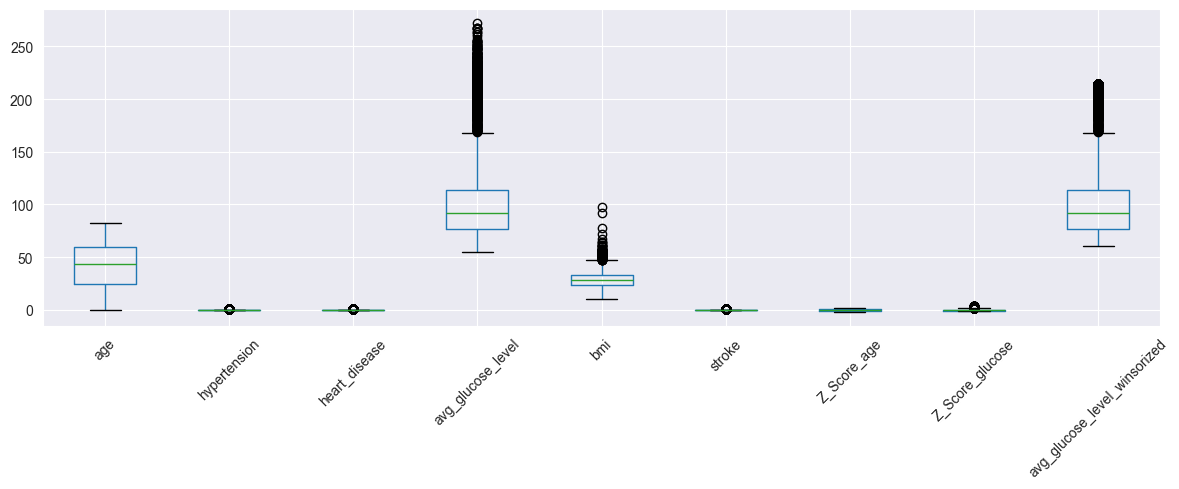

In [24]:
plt.figure(figsize=(12, 5))
df.boxplot(fontsize=10)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()